 # ClusterAI - 2020
## TP integrador - Primera parte
### Pre Processing y ML - Obras Públicas
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_excel('obras_en_meses.xlsx')

In [3]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_meses,monto_miles,comuna
0,0,Finalizada,Escuelas,29,67065.700,12
1,1,Finalizada,Espacio Público,16,9950.017,12
2,2,Finalizada,Espacio Público,22,36942.632,1
3,3,Finalizada,Espacio Público,28,26938.294,1
4,4,Finalizada,Vivienda,12,6990.315,8


In [4]:
obras['etapa'].replace('En ejecución',np.nan,inplace=True)
obras['etapa'].replace('En licitación',np.nan,inplace=True)

In [5]:
obras.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [6]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y = obras.iloc[:,3]
y

0      29
1      16
2      22
3      28
4      12
       ..
929     2
930     1
931     1
932     1
933     1
Name: plazo_meses, Length: 883, dtype: int64

In [ ]:
# Al ser una variable categórica la vamos a transformar

#from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#y = le.fit_transform(y)
#obras['Encoded'] = y

## FEATURES

In [7]:
tipo_obra = pd.get_dummies(obras.tipo)
obras = obras.join(tipo_obra)
obras

,Unnamed: 0,etapa,tipo,plazo_meses,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,29,67065.700,12,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,16,9950.017,12,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,22,36942.632,1,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,28,26938.294,1,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,12,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,2,2325.368,8,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,1,1984.627,8,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,1,6557.067,9,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,1,22279.428,15,0,0,1,0,0,0,0


In [8]:
x = obras.iloc[:,4:]
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [ ]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
#x = x.drop(['Encoded'],axis=1)
#x

In [9]:
obras['plazo_meses'].value_counts()

2     91
3     91
1     87
4     71
6     62
5     53
7     50
12    39
10    39
8     28
9     26
18    24
16    22
17    21
13    20
15    20
11    18
14    16
20    14
19    13
21    12
23     7
27     7
26     6
24     5
28     5
29     5
22     5
30     3
31     3
37     3
33     2
42     2
32     2
55     1
52     1
46     1
45     1
57     1
40     1
38     1
35     1
34     1
25     1
86     1
Name: plazo_meses, dtype: int64

In [12]:
y.shape

(883,)

In [13]:
#tipo_obras_upsampled = pd.get_dummies(obras_upsampled.tipo)
#obras_upsampled = obras_upsampled.join(tipo_obras_upsampled)
#x = obras.iloc[:,4:]
#x = x.drop(['plazo_meses'],axis=1)

In [14]:
x.shape

(883, 9)

## PRE PROCESAMIENTO

In [15]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [16]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (618, 9)
Se corresponde con el "Y" de entrenamiento (618,)


In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(xtrain)

In [18]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [19]:
xtrain_scaled.shape

(618, 9)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [20]:
# Definimos el clasificador

svc = SVC(probability=True, class_weight='balanced')

param_svc={'kernel':('linear','rbf'),
           'C':[0.001, 0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [21]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.11978756884343036


In [22]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

El accuracy obtenido fue de 0.12 


In [23]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [24]:
rdos = rdos.append({'Clasificador':'SVC',
                   'Accuracy': score_svc}, ignore_index=True)

In [25]:
print(classification_report(ytest, ypred_svc))

              precision    recall  f1-score   support

           1       0.45      0.31      0.37        32
           2       0.38      0.24      0.29        21
           3       0.08      0.11      0.09        19
           4       0.08      0.04      0.06        23
           5       0.32      0.35      0.33        20
           6       0.17      0.04      0.07        24
           7       0.09      0.13      0.11        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        15
          11       0.04      0.20      0.07         5
          12       0.25      0.22      0.24         9
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          17       0.25      0.14      0.18         7
          18       0.14    

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Classifier

In [26]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [27]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 20}
El score obtenido fue:  0.1488722790453711
El accuracy obtenido fue de 0.15 


In [28]:
rdos = rdos.append({'Clasificador':'KNN',
                    'Accuracy': score_knn}, ignore_index=True)

In [29]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [30]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

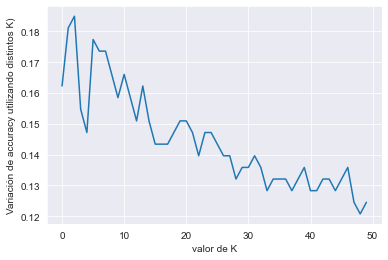

In [32]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

In [33]:
# Como vimos del gráfico anterior, a mayor K, el accuracy disminuye. 

rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943


### Random Forest Classifier

In [34]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [35]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 5}
El score obtenido fue:  0.15864148964070285
El accuracy obtenido fue de 0.13 


In [36]:
rdos = rdos.append({'Clasificador':'Random Forest',
                   'Accuracy': score_rfr}, ignore_index=True)

In [37]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.128302


### Logistic Regression 

In [38]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [39]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 150}
El score obtenido fue:  0.14083398898505112
El accuracy obtenido fue de 0.16 


In [40]:
rdos = rdos.append({'Clasificador':'LR',
                   'Accuracy': score_lr}, ignore_index=True)

In [41]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.128302
3,LR,0.162264


### One Vs Rest Classifier (SVM)

In [42]:
# Al ser un problema de clasificación multiclase, probamos con OVO y OVR

ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [43]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR',
                   'Accuracy': score_ovr}, ignore_index=True)

In [44]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.128302
3,LR,0.162264
4,OVR,0.015094


### One Vs One Classifier (SVM)

In [45]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [46]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.09433962264150944

In [47]:
rdos = rdos.append({'Clasificador':'OVO',
                   'Accuracy': score_ovo}, ignore_index=True)

In [48]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.128302
3,LR,0.162264
4,OVR,0.015094
5,OVO,0.094340


## Resultados / Visualización

In [49]:
from sklearn.metrics import plot_confusion_matrix

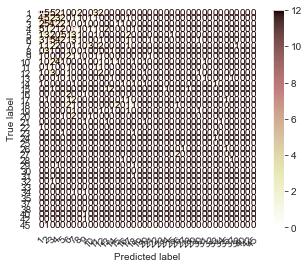

In [50]:
#labels = {'De 1 a 2 años','De 2 a 3 años','Menos de 1 año','Más de 3 años'}

disp = plot_confusion_matrix(gs_rfr, xtest_scaled, ytest,
                            #display_labels=labels,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45)


In [51]:
print(classification_report(ytest, ypred_rfr))

              precision    recall  f1-score   support

           1       0.36      0.38      0.37        32
           2       0.19      0.24      0.21        21
           3       0.13      0.21      0.16        19
           4       0.05      0.04      0.05        23
           5       0.29      0.25      0.27        20
           6       0.07      0.04      0.05        24
           7       0.04      0.07      0.05        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        15
          11       0.12      0.20      0.15         5
          12       0.18      0.22      0.20         9
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          17       0.12      0.14      0.13         7
          18       0.14    

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
